## This is an exercise of transfer learning based on tutorial by François Chollet
Use pre-trained deep CNN and fine tune it to achieve up to 95% accuracy of classifying hotwheels cars as real car vs fantasy car.

In [1]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image


TensorFlow version is  1.12.0


In [2]:
base_dir = '/home/wenbo/Desktop/hotwheels'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
image_size = 160 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),  
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 801 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


## Example of a fantasy car

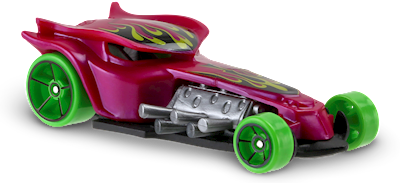

In [4]:
Image(filename='/home/wenbo/Desktop/hotwheels/train/fantasy/DHX04_c_16_003.png') 

##  Example of a real car

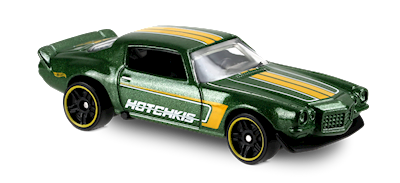

In [5]:
Image(filename='/home/wenbo/Desktop/hotwheels/train/production/FJW47_c_18_003_sh.png') 

In [6]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [7]:
base_model.trainable = False

In [8]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
epochs = 100
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Epoch 1/100
25/25 [==============================] - 4s 178ms/step - loss: 0.6887 - acc: 0.6044 - val_loss: 0.8669 - val_acc: 0.5938
Epoch 2/100
25/25 [==============================] - 2s 69ms/step - loss: 0.6763 - acc: 0.5956 - val_loss: 0.8039 - val_acc: 0.6062
Epoch 3/100
25/25 [==============================] - 2s 66ms/step - loss: 0.6578 - acc: 0.5884 - val_loss: 0.7502 - val_acc: 0.6219
Epoch 4/100
25/25 [==============================] - 2s 65ms/step - loss: 0.5961 - acc: 0.6695 - val_loss: 0.7413 - val_acc: 0.6344
Epoch 5/100
25/25 [==============================] - 2s 67ms/step - loss: 0.5853 - acc: 0.6925 - val_loss: 0.7270 - val_acc: 0.6375
Epoch 6/100
25/25 [==============================] - 2s 66ms/step - loss: 0.5483 - acc: 0.7354 - val_loss: 0.7195 - val_acc: 0.6406
Epoch 7/100
25/25 [==============================] - 2s 64ms/step - loss: 0.5315 - acc: 0.7408 - val_loss: 0.7034 - val_acc: 0.6406
Epoch 8/100
25/25 [==============================] - 2s 65ms/step - loss: 0

25/25 [==============================] - 2s 61ms/step - loss: 0.2514 - acc: 0.9025 - val_loss: 0.2744 - val_acc: 0.8938
Epoch 63/100
25/25 [==============================] - 2s 66ms/step - loss: 0.2542 - acc: 0.8801 - val_loss: 0.2741 - val_acc: 0.9000
Epoch 64/100
25/25 [==============================] - 2s 62ms/step - loss: 0.2012 - acc: 0.9438 - val_loss: 0.2760 - val_acc: 0.8938
Epoch 65/100
25/25 [==============================] - 2s 64ms/step - loss: 0.2393 - acc: 0.9211 - val_loss: 0.2737 - val_acc: 0.8969
Epoch 66/100
25/25 [==============================] - 2s 67ms/step - loss: 0.2440 - acc: 0.9039 - val_loss: 0.2737 - val_acc: 0.8969
Epoch 67/100
25/25 [==============================] - 2s 63ms/step - loss: 0.2181 - acc: 0.9286 - val_loss: 0.2780 - val_acc: 0.8969
Epoch 68/100
25/25 [==============================] - 2s 62ms/step - loss: 0.2357 - acc: 0.8939 - val_loss: 0.2701 - val_acc: 0.9000
Epoch 69/100
25/25 [==============================] - 2s 63ms/step - loss: 0.2368 

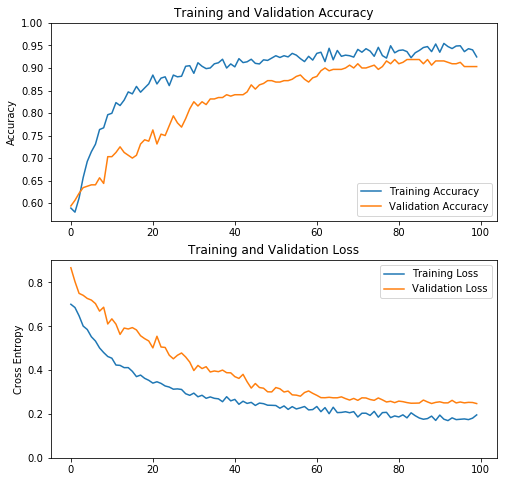

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()


In [13]:
base_model.trainable = True

In [14]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [15]:

model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [17]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps)

Epoch 1/100
25/25 [==============================] - 5s 186ms/step - loss: 0.1933 - acc: 0.9127 - val_loss: 0.2209 - val_acc: 0.9187
Epoch 2/100
25/25 [==============================] - 2s 83ms/step - loss: 0.1005 - acc: 0.9787 - val_loss: 0.2086 - val_acc: 0.9187
Epoch 3/100
25/25 [==============================] - 2s 84ms/step - loss: 0.1042 - acc: 0.9490 - val_loss: 0.2024 - val_acc: 0.9187
Epoch 4/100
25/25 [==============================] - 2s 87ms/step - loss: 0.1041 - acc: 0.9502 - val_loss: 0.2099 - val_acc: 0.9219
Epoch 5/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0438 - acc: 0.9962 - val_loss: 0.2004 - val_acc: 0.9187
Epoch 6/100
25/25 [==============================] - 2s 77ms/step - loss: 0.1058 - acc: 0.9205 - val_loss: 0.1977 - val_acc: 0.9250
Epoch 7/100
25/25 [==============================] - 2s 86ms/step - loss: 0.0483 - acc: 1.0000 - val_loss: 0.1857 - val_acc: 0.9250
Epoch 8/100
25/25 [==============================] - 2s 88ms/step - loss: 0

25/25 [==============================] - 2s 84ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.1588 - val_acc: 0.9469
Epoch 63/100
25/25 [==============================] - 2s 80ms/step - loss: 0.0110 - acc: 1.0000 - val_loss: 0.1594 - val_acc: 0.9469
Epoch 64/100
25/25 [==============================] - 2s 79ms/step - loss: 0.0651 - acc: 0.9615 - val_loss: 0.1649 - val_acc: 0.9437
Epoch 65/100
25/25 [==============================] - 2s 82ms/step - loss: 0.0110 - acc: 1.0000 - val_loss: 0.1645 - val_acc: 0.9469
Epoch 66/100
25/25 [==============================] - 2s 83ms/step - loss: 0.0374 - acc: 0.9615 - val_loss: 0.1716 - val_acc: 0.9406
Epoch 67/100
25/25 [==============================] - 2s 82ms/step - loss: 0.0471 - acc: 0.9615 - val_loss: 0.1678 - val_acc: 0.9437
Epoch 68/100
25/25 [==============================] - 2s 81ms/step - loss: 9.2023e-04 - acc: 1.0000 - val_loss: 0.1673 - val_acc: 0.9406
Epoch 69/100
25/25 [==============================] - 2s 75ms/step - loss: 0.0

In [18]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

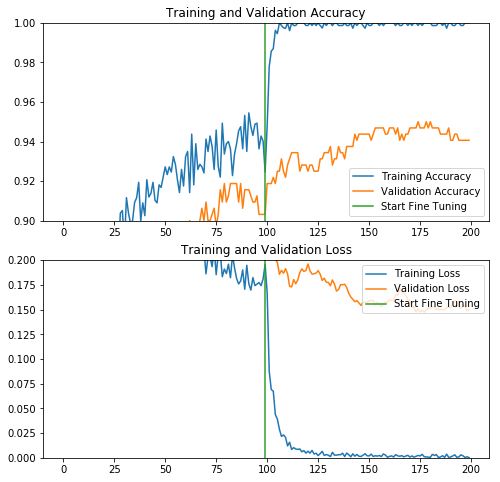

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Test classify a car

In [20]:
test_dir = os.path.join(base_dir, 'test')

In [21]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

In [22]:
test_generator = test_datagen.flow_from_directory(
                test_dir,  # Source directory for the test images
                target_size=(image_size, image_size),  
                batch_size= 1,
                class_mode=None)

Found 1 images belonging to 1 classes.


In [23]:
pred = model.predict_generator(test_generator, 1)

In [24]:
print('fantasy car' if pred < 0.5 else 'real car')

real car


##  This is what it looks like

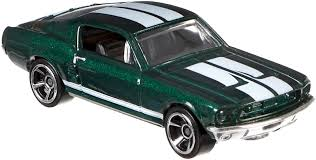

In [25]:
Image(filename='/home/wenbo/Desktop/hotwheels/test/difficult/images.jpeg')